<a href="https://colab.research.google.com/github/agravatmanas07/data-analysis-projects/blob/main/Lab_long_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 Load the dataset into a DataFrame**

In [ ]:
import numpy as np
import pandas as pd
from imblearn . over_sampling import SMOTE
from sklearn . preprocessing import StandardScaler
from sklearn . feature_selection import SelectKBest , f_classif
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv(r'/content/laptops(lab_long_1) (1).csv', sep=';', header=None)
df

,0,1,2,3,4,5,6
0,Price ($),Screen Size (in.),RAM Memory (GB),Hard drive (GB),USB Ports,Brand,Weight (oz.)
1,830,13.3,4,500,3,Toshiba,4.9
2,750,13.3,4,640,3,Toshiba,3.2
3,1200,11.6,2,128,2,Apple,2.3
4,1600,18.4,6,640,4,Toshiba,9.7
...,...,...,...,...,...,...,...
59,650,14,4,640,2,Toshiba,5.4
60,630,15.6,4,500,3,Toshiba,5.8
61,750,15.6,4,500,3,HP,5.4
62,800,15.6,8,750,3,Toshiba,5.9


In [ ]:
#3.Visualize the contents of the dataset using the .head() function. What are the variables in this dataset?
df.head()


,0,1,2,3,4,5,6
0,Price ($),Screen Size (in.),RAM Memory (GB),Hard drive (GB),USB Ports,Brand,Weight (oz.)
1,830,13.3,4,500,3,Toshiba,4.9
2,750,13.3,4,640,3,Toshiba,3.2
3,1200,11.6,2,128,2,Apple,2.3
4,1600,18.4,6,640,4,Toshiba,9.7


In [ ]:
#4.Display the first 6 rows of the DataFrame.
df.head(6)

,0,1,2,3,4,5,6
0,Price ($),Screen Size (in.),RAM Memory (GB),Hard drive (GB),USB Ports,Brand,Weight (oz.)
1,830,13.3,4,500,3,Toshiba,4.9
2,750,13.3,4,640,3,Toshiba,3.2
3,1200,11.6,2,128,2,Apple,2.3
4,1600,18.4,6,640,4,Toshiba,9.7
5,1900,18.4,8,500,4,Toshiba,9.7


In [ ]:
#5.Assign the following column names to the dataset: ”Price”, ”Size”, ”RAM”, ”Disk”,”Ports”, ”Brand”, ”Weight”
df.columns = ['Price', 'Size', 'RAM', 'Disk', 'Ports', 'Brand', 'Weight']
df

,Price,Size,RAM,Disk,Ports,Brand,Weight
0,Price ($),Screen Size (in.),RAM Memory (GB),Hard drive (GB),USB Ports,Brand,Weight (oz.)
1,830,13.3,4,500,3,Toshiba,4.9
2,750,13.3,4,640,3,Toshiba,3.2
3,1200,11.6,2,128,2,Apple,2.3
4,1600,18.4,6,640,4,Toshiba,9.7
...,...,...,...,...,...,...,...
59,650,14,4,640,2,Toshiba,5.4
60,630,15.6,4,500,3,Toshiba,5.8
61,750,15.6,4,500,3,HP,5.4
62,800,15.6,8,750,3,Toshiba,5.9


In [ ]:
#6.Display basic statistical measures for the dataset using the .describe() function.
df.describe()

,Price,Size,RAM,Disk,Ports,Brand,Weight
count,64,64,64,64,64,64,64
unique,36,12,6,11,5,4,28
top,1200,15.6,4,500,3,Toshiba,5.5
freq,5,26,32,22,28,26,9


In [ ]:
#7.What is the maximum and minimum price of a laptop in $?

min_price = df['Price'].min()
max_price = df['Price'].max()
print(f"Minimum price: ${min_price}")
print(f"Maximum price: ${max_price}")

Minimum price: $1000
Maximum price: $Price ($)


In [ ]:
#8.What is the minimum number of ports found in a laptop from the studied sample?


min_ports = df['Ports'].min()
print(f"Minimum number of ports: {min_ports}")

Minimum number of ports: 1


In [ ]:
#9.What is the average size of a laptop?

df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Calculate the average size
avg_size = df['Size'].mean()
print(f"Average laptop size: {avg_size}")

Average laptop size: 15.27142857142857


In [ ]:
#10.What is the median weight in ounces?

df['Weight'] = df['Weight'].str.extract(r'(\d+\.?\d*)').astype(float)
median_weight = df['Weight'].median()
print(f"Median weight: {median_weight}")

Median weight: 5.5


In [ ]:
#11.What are the characteristics of the brand (length, class, mode)?

brand_counts = df['Brand'].value_counts()
print("Brand characteristics:")
print(brand_counts)

Brand characteristics:
Brand
Toshiba    26
HP         26
Apple      11
Brand       1
Name: count, dtype: int64


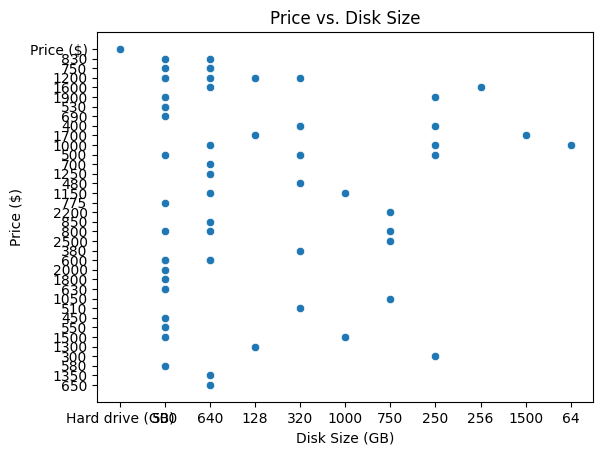

In [ ]:
#12.We propose to explain the Price ($) as a function of Disk size (GB). Display a scatter plot using seaborn. What do you notice?

import seaborn as sns
sns.scatterplot(x='Disk', y='Price', data=df)
plt.title('Price vs. Disk Size')
plt.xlabel('Disk Size (GB)')
plt.ylabel('Price ($)')
plt.show()

In [ ]:
df.head()

,Price,Size,RAM,Disk,Ports,Brand,Weight
0,Price ($),NaN,RAM Memory (GB),Hard drive (GB),USB Ports,Brand,NaN
1,830,13.3,4,500,3,Toshiba,4.9
2,750,13.3,4,640,3,Toshiba,3.2
3,1200,11.6,2,128,2,Apple,2.3
4,1600,18.4,6,640,4,Toshiba,9.7


In [ ]:
#13. Can we establish a linear model to represent the relationship between the Price and Disk
# size? If yes, add the regression line. Interpret (Is there a strong correlation between the
# data?).

from sklearn.linear_model import LinearRegression

x = 'Disk'
y = 'Price'


df['Disk_GB'] = df['Disk'].str.extract(r'(\d+)').astype(float)

df = df.dropna(subset=['Disk_GB'])



model = LinearRegression()

model.fit(df[['Disk_GB']], df[y])


slope = model.coef_[0]
intercept = model.intercept_

print(f"Regression equation: Price = {slope:.2f} * Disk + {intercept:.2f}")

Regression equation: Price = 0.58 * Disk + 662.66


<ipython-input-47-d26525e0da11>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


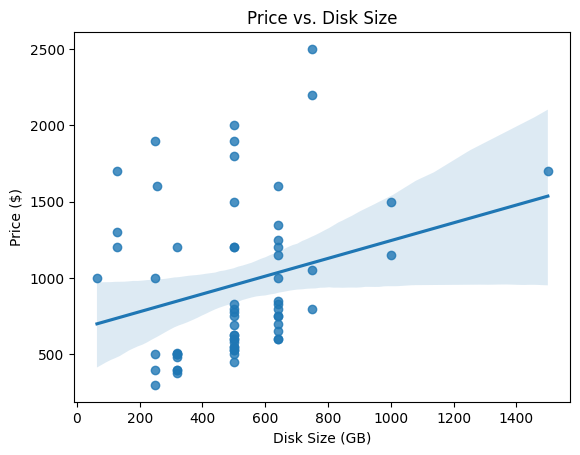

In [ ]:
#13. Evaluate the quality of the model based on the plot.

import seaborn as sns
import matplotlib.pyplot as plt

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with NaN values in 'Price' after conversion
df = df.dropna(subset=['Price', 'Disk_GB'])

sns.regplot(x='Disk_GB', y='Price', data=df)
plt.title('Price vs. Disk Size')
plt.xlabel('Disk Size (GB)')
plt.ylabel('Price ($)')
plt.show()

In [ ]:
#14. mse and r2squre


#14. mse and r2squre


import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model4 = LinearRegression()

print(df.columns)

model4.fit(df[['Disk_GB', 'Size', 'RAM']], df['Price'])


y_pred = model4.predict(df[['Disk_GB', 'Size', 'RAM']])


y_actual = df['Price']

# Calculate MSE
mse = mean_squared_error(y_actual, y_pred)

# Calculate R-squared
r2 = r2_score(y_actual, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Index(['Price', 'Size', 'RAM', 'Disk', 'Ports', 'Brand', 'Weight', 'Disk_GB'], dtype='object')
Mean Squared Error (MSE): 240106.2804769692
R-squared (R²): 0.06981537023924334


In [ ]:
#15.Determine the covariance between Price and Disk size. Interpret.

covariance = df['Price'].cov(df['Disk_GB'])
print(f"Covariance between Price and Disk size: {covariance}")


covariance = df[['Price','Disk_GB']].cov().iloc[0, 1]
print(f"Covariance between Price and Disk size: {covariance}")

Covariance between Price and Disk size: 31090.161290322587
Covariance between Price and Disk size: 31090.161290322587


In [ ]:
#16.Determine the correlation coefficient. Interpret.

correlation_coefficient = df['Price'].corr(df['Disk_GB'])
print(f"Correlation coefficient between Price and Disk size: {correlation_coefficient}")

Correlation coefficient between Price and Disk size: 0.2627363437377957


In [ ]:
#17.Determine the coefficient of determination (R2). Interpret.

from sklearn.metrics import r2_score

r2 = r2_score(df['Price'], df['Disk_GB'])
print(f"Coefficient of determination (R2): {r2}")

Coefficient of determination (R2): -0.754344259306843


In [ ]:
#18.Display statistical measures for the obtained linear model.

import statsmodels.api as sm

x = sm.add_constant(df['Disk_GB'])
model = sm.OLS(df['Price'], x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     4.523
Date:                Thu, 31 Oct 2024   Prob (F-statistic):             0.0375
Time:                        10:27:28   Log-Likelihood:                -479.67
No. Observations:                  63   AIC:                             963.3
Df Residuals:                      61   BIC:                             967.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        662.6592    152.334      4.350      0.0

In [ ]:
#19.Analyze the linear model from an inferential perspective by interpreting the p-value.

import statsmodels.api as sm

x = sm.add_constant(df['Disk_GB'])
model = sm.OLS(df['Price'], x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     4.523
Date:                Thu, 31 Oct 2024   Prob (F-statistic):             0.0375
Time:                        10:27:29   Log-Likelihood:                -479.67
No. Observations:                  63   AIC:                             963.3
Df Residuals:                      61   BIC:                             967.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        662.6592    152.334      4.350      0.0

Multiple Linear Regression Model:
Intercept: 761.498689646619
Coefficients:
Hard drive (GB): 0.6560896302875447
Screen Size (in.): 4.111255037294135
USB Ports: -206.53460401632302
Weight (oz.): 51.625075675090095
RAM Memory (GB): 12.864192825493426

R-squared: 0.1173
RMSE: 477.3475


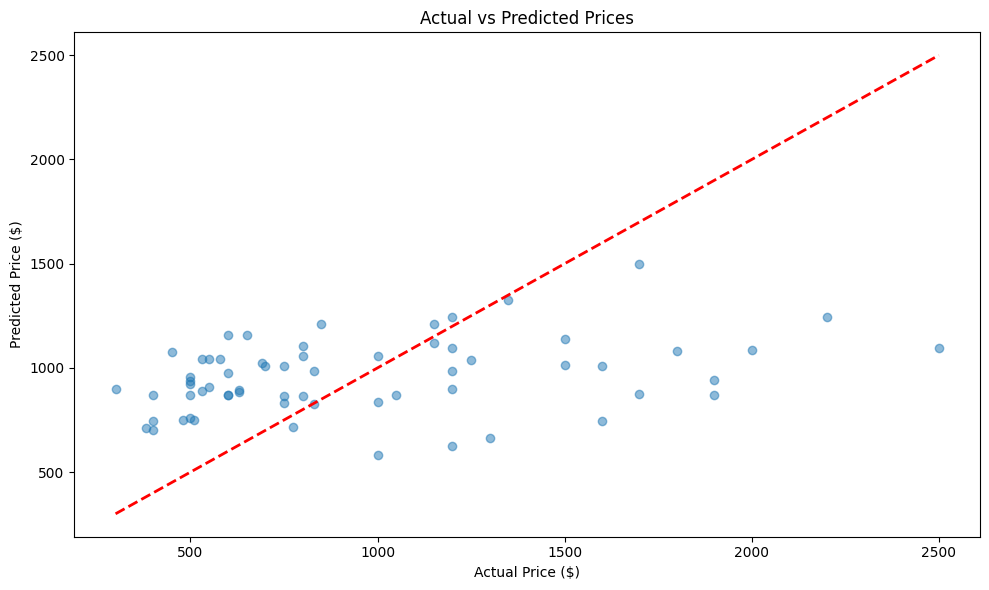

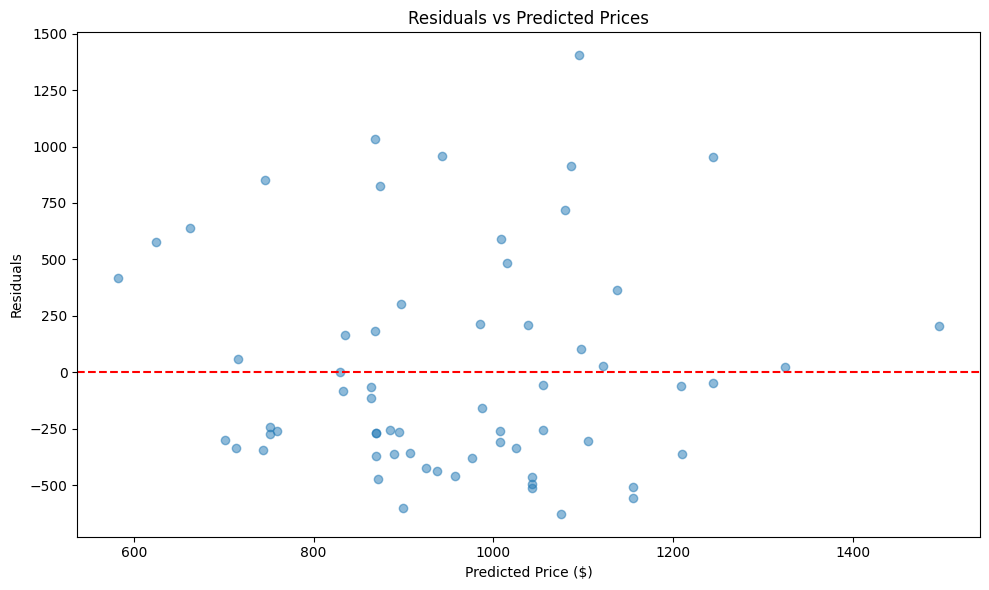

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Read the CSV data
df = pd.read_csv('/content/laptops(lab_long_1) (1).csv', sep=';')

# Prepare the features (X) and target variable (y)
X = df[['Hard drive (GB)', 'Screen Size (in.)', 'USB Ports', 'Weight (oz.)', 'RAM Memory (GB)']]
y = df['Price ($)']

# Create and fit the model
model2 = LinearRegression()
model2.fit(X, y)

# Print model details
print("Multiple Linear Regression Model:")
print("Intercept:", model2.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model2.coef_):
    print(f"{feature}: {coef}")

# Calculate R-squared and RMSE
y_pred = model2.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"\nR-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs Predicted Prices")
plt.tight_layout()
plt.show()

# Plot residuals
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.tight_layout()
plt.show()

In [ ]:
#21.Display basic statistical measures for the model using the .summary() method. What do you notice regarding the global model p-value and that of Disk? Observe the values of the standard error; what do you notice?

import statsmodels.formula.api as sm

# Define the formula for the model
formula = 'Q("Price ($)") ~ Q("Hard drive (GB)") + Q("Screen Size (in.)") + Q("USB Ports") + Q("Weight (oz.)") + Q("RAM Memory (GB)")'

# Create the model
model2 = sm.ols(formula=formula, data=df).fit()

print(model2.summary())





                            OLS Regression Results                            
Dep. Variable:         Q("Price ($)")   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.514
Date:                Thu, 31 Oct 2024   Prob (F-statistic):              0.200
Time:                        10:27:32   Log-Likelihood:                -477.99
No. Observations:                  63   AIC:                             968.0
Df Residuals:                      57   BIC:                             980.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                761

In [ ]:
#22.Determine the Variance Inflation Factor (VIF) using the vif function to test for multi-collinearity.

import pandas as pd
import statsmodels.api as sm # Changed import to statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Define the predictors
X = df[['Hard drive (GB)', 'Screen Size (in.)', 'USB Ports', 'Weight (oz.)', 'RAM Memory (GB)']]

# Add a constant to the predictors (required for VIF calculation)
X = sm.add_constant(X) # Now using sm which refers to statsmodels.api

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif_data)

            Variable         VIF
0              const  224.317508
1    Hard drive (GB)    2.771311
2  Screen Size (in.)    5.704111
3          USB Ports    1.837952
4       Weight (oz.)    5.224199
5    RAM Memory (GB)    3.184779


In [ ]:
#23.Determine the correlation matrix of the dataset without the categorical variable (Brand). Check the correlation between Weight and Size.

correlation_matrix = df.drop('Brand', axis=1).corr()
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                   Price ($)  Screen Size (in.)  RAM Memory (GB)  \
Price ($)           1.000000           0.155956         0.223990   
Screen Size (in.)   0.155956           1.000000         0.646148   
RAM Memory (GB)     0.223990           0.646148         1.000000   
Hard drive (GB)     0.262736           0.560412         0.786727   
USB Ports          -0.006852           0.638097         0.533892   
Weight (oz.)        0.182244           0.895285         0.642392   

                   Hard drive (GB)  USB Ports  Weight (oz.)  
Price ($)                 0.262736  -0.006852      0.182244  
Screen Size (in.)         0.560412   0.638097      0.895285  
RAM Memory (GB)           0.786727   0.533892      0.642392  
Hard drive (GB)           1.000000   0.540018      0.552018  
USB Ports                 0.540018   1.000000      0.585799  
Weight (oz.)              0.552018   0.585799      1.000000  


In [ ]:
#24.We propose to correct the model by ignoring the Weight variable. Establish the new linear model (model4). Has the model improved?

import pandas as pd
import statsmodels.formula.api as sm


formula_model4 = 'Q("Price ($)") ~ Q("Hard drive (GB)") + Q("Screen Size (in.)") + Q("USB Ports") + Q("RAM Memory (GB)")'


model4 = sm.ols(formula=formula_model4, data=df).fit()

# Print the model summary
print(model4.summary())



                            OLS Regression Results                            
Dep. Variable:         Q("Price ($)")   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     1.848
Date:                Thu, 31 Oct 2024   Prob (F-statistic):              0.132
Time:                        10:27:35   Log-Likelihood:                -478.14
No. Observations:                  63   AIC:                             966.3
Df Residuals:                      58   BIC:                             977.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                427

In [ ]:
#25 We propose to correct the model by ignoring the RAM variable. Establish the new linear model (model5). Has the model improved?

import statsmodels.formula.api as sm


formula_model5 = 'Q("Price ($)") ~ Q("Hard drive (GB)") + Q("Screen Size (in.)") + Q("USB Ports") + Q("Weight (oz.)")'


model5 = sm.ols(formula=formula_model5, data=df).fit()

# Print the model summary
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("Price ($)")   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1.917
Date:                Thu, 31 Oct 2024   Prob (F-statistic):              0.120
Time:                        10:27:36   Log-Likelihood:                -478.01
No. Observations:                  63   AIC:                             966.0
Df Residuals:                      58   BIC:                             976.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                749

In [ ]:
#26 Determine the VIF for model 5. Interpret.

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the predictors for model5
X_model5 = df[['Hard drive (GB)', 'Screen Size (in.)', 'USB Ports', 'Weight (oz.)']]

# Add a constant to the predictors
X_model5 = sm.add_constant(X_model5)

# Create a DataFrame to store the VIF values
vif_data_model5 = pd.DataFrame()
vif_data_model5["Variable"] = X_model5.columns
vif_data_model5["VIF"] = [variance_inflation_factor(X_model5.values, i) for i in range(X_model5.shape[1])]

# Print the VIF values
print(vif_data_model5)

            Variable         VIF
0              const  223.186742
1    Hard drive (GB)    1.614967
2  Screen Size (in.)    5.634379
3          USB Ports    1.837181
4       Weight (oz.)    5.134125


In [ ]:
#27 Determine the centered reduced coefficients (the β) using the lm.beta function.

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


X = df[['Hard drive (GB)', 'Screen Size (in.)', 'USB Ports', 'Weight (oz.)']]


y = df['Price ($)']

# Scale the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit a Linear Regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Get the standardized coefficients
standardized_coefs = model.coef_

# Print the standardized coefficients
print("Standardized Coefficients (β):")
for i, coef in enumerate(standardized_coefs):
    print(f"{X.columns[i]}: {coef}")

Standardized Coefficients (β):
Hard drive (GB): 162.13743227921404
Screen Size (in.): 9.339415320406776
USB Ports: -142.97100036391822
Weight (oz.): 78.47946603010635


In [ ]:
#28 Use confidence intervals with the confint function to see for each β. Interpret.

import statsmodels.formula.api as sm

model5_sm = sm.ols(formula=formula_model5, data=df).fit()

# Get the confidence intervals for the coefficients
conf_intervals = model5_sm.conf_int()

# Print the confidence intervals
print("Confidence Intervals for Standardized Coefficients (β):")
print(conf_intervals)

Confidence Intervals for Standardized Coefficients (β):
                                  0            1
Intercept              -1124.996047  2624.746852
Q("Hard drive (GB)")       0.011573     1.403166
Q("Screen Size (in.)")  -183.839542   195.739957
Q("USB Ports")          -451.306478    39.112334
Q("Weight (oz.)")       -141.340620   249.095005


In [ ]:
X = df[['Hard drive (GB)', 'Screen Size (in.)', 'USB Ports', 'Weight (oz.)']]
y = df['Price ($)']

# 1. Scale the predictors:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Create and fit the Linear Regression model:
model = LinearRegression()
model.fit(X_scaled, y)

# 3. Calculate standardized coefficients:
# Get the standard deviations of the original features:
std_devs = df[['Hard drive (GB)', 'Screen Size (in.)', 'USB Ports', 'Weight (oz.)']].std(numeric_only=True)
# using numeric_only=True for compatibility

# Divide the model coefficients by the standard deviations:
standardized_coeffs = model.coef_ / std_devs

print(standardized_coeffs)

Hard drive (GB)        0.701733
Screen Size (in.)      5.902795
USB Ports           -204.454838
Weight (oz.)          53.447885
dtype: float64
